## This noteboook explores the data quality of the two Quandl data sets for Capstone project

In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(style="ticks", color_codes=True)

plt.rcParams["figure.figsize"] = [15.0,6.0]

### Exploring the fundamental data first

In [15]:
#The below is the first of the two quandl datasets I have subscribed to. This one contains core fundamental data for India 
### please unzip DEB.zip file in ./DEB to be able to run the below code ###
df = pd.read_csv('DEB\\DEB_20170718.csv', names = ['dataname','date','standalone','consolidated'], 
                 header = None, parse_dates = ['date'])


In [16]:
df.head()

,dataname,date,standalone,consolidated
0,20MICRONS_A_ACCRUALS,2005-03-31,-10.44,NaN
1,20MICRONS_A_ACCRUALS,2006-03-31,0.44,NaN
2,20MICRONS_A_ACCRUALS,2007-03-31,-2.61,NaN
3,20MICRONS_A_ACCRUALS,2008-03-31,-2.54,NaN
4,20MICRONS_A_ACCRUALS,2009-03-31,1.00,0.84


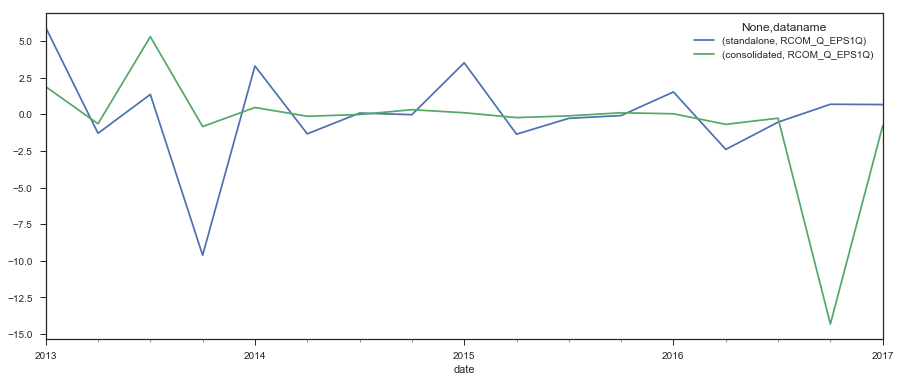

In [17]:
#First let us try to plot a specific feature to see if we can replicate the chart as seen on quandl
a = df[df.dataname == 'RCOM_Q_EPS1Q'].set_index(['date','dataname'])
a.unstack().plot()
#Awsome! have been able to replicate the chart of this from quandl.

In [ ]:
len(df) # 9 million rows! 

In [ ]:
df.date.min()

In [18]:
#To avoid changing code everywhere I am simply editing the date from 2016 to 2005, 
#so dfsmall is not small anymore but full df
dfsmall = df[df.date >= '2005-01-01']

In [19]:
len(dfsmall) 

9191479

In [20]:
#split the feature column into ticker, freq and indicator
splitfeature = dfsmall['dataname'].str.split('_')
splitfeature.head()

0    [20MICRONS, A, ACCRUALS]
1    [20MICRONS, A, ACCRUALS]
2    [20MICRONS, A, ACCRUALS]
3    [20MICRONS, A, ACCRUALS]
4    [20MICRONS, A, ACCRUALS]
Name: dataname, dtype: object

In [23]:
splitfeature.apply(len).value_counts() # count how many strings is each dataname split into, after splitting by underscores

3    8867045
4     324434
Name: dataname, dtype: int64

#### Need to check why there are these 4 strings sometimes 
(dataname was supposed to be of the form ticker_freq_indicator) 

In [ ]:
splitfeature[splitfeature.apply(len) == 4].head(10) 
# looks like the feature name is split by an underscore sometimes.

In [ ]:
#let us make sure the 2nd column always as A (Annual) and Q(Quarterly)
splitfeature.apply(lambda x: x[1]).value_counts()

In [24]:
#So, thankfully the first string before _ is always company ticker, 
#the second is always freq and indicator name is mostly without
#an underscore, but sometimes with an underscore.
splitfeature = dfsmall['dataname'].str.split('_').apply(lambda x: x if len(x)==3 else [x[0],x[1],x[2] + '_'+ x[3]] ) 

In [46]:
# again count how many strings are there after splitting by underscores
splitfeature.apply(len).value_counts() 

3    9191479
Name: dataname, dtype: int64

In [47]:
#Good, so now we have only three elements. Lets check what has happened to those locations where there were 4 elements
splitfeature[dfsmall['dataname'].str.split('_').apply(len) == 4].head(10)

281    [20MICRONS, A, CFO_DEBT]
282    [20MICRONS, A, CFO_DEBT]
283    [20MICRONS, A, CFO_DEBT]
284    [20MICRONS, A, CFO_DEBT]
285    [20MICRONS, A, CFO_DEBT]
286    [20MICRONS, A, CFO_DEBT]
287    [20MICRONS, A, CFO_DEBT]
288    [20MICRONS, A, CFO_DEBT]
289    [20MICRONS, A, CFO_DEBT]
290    [20MICRONS, A, CFO_DEBT]
Name: dataname, dtype: object

In [25]:
# success: the 3rd and 4th items are merged back like CFO_DEBT 
#ok time to convert this into a dataframe
splitfeature_df = pd.DataFrame(splitfeature.tolist(),columns = ['ticker','freq','indicator'])
#pd.DataFrame(splitfeature.tolist(),columns = {'ticker','freq','indicator'}), dfsmall],axis=1)
splitfeature_df.head()

,ticker,freq,indicator
0,20MICRONS,A,ACCRUALS
1,20MICRONS,A,ACCRUALS
2,20MICRONS,A,ACCRUALS
3,20MICRONS,A,ACCRUALS
4,20MICRONS,A,ACCRUALS


In [49]:
dfsmall.shape

(9191479, 4)

In [50]:
pd.concat([dfsmall, splitfeature_df], axis = 1).head(5) #Ah, understood why this is not working. The indices are different!

,dataname,date,standalone,consolidated,ticker,freq,indicator
0,20MICRONS_A_ACCRUALS,2005-03-31,-10.44,NaN,20MICRONS,A,ACCRUALS
1,20MICRONS_A_ACCRUALS,2006-03-31,0.44,NaN,20MICRONS,A,ACCRUALS
2,20MICRONS_A_ACCRUALS,2007-03-31,-2.61,NaN,20MICRONS,A,ACCRUALS
3,20MICRONS_A_ACCRUALS,2008-03-31,-2.54,NaN,20MICRONS,A,ACCRUALS
4,20MICRONS_A_ACCRUALS,2009-03-31,1.00,0.84,20MICRONS,A,ACCRUALS


In [26]:
#Make indices same
splitfeature_df.set_index(dfsmall.index,inplace=True)


In [27]:
#now put them next to each other
dfsmall_split = pd.concat([dfsmall, splitfeature_df], axis = 1)
dfsmall_split.head(5)

,dataname,date,standalone,consolidated,ticker,freq,indicator
0,20MICRONS_A_ACCRUALS,2005-03-31,-10.44,NaN,20MICRONS,A,ACCRUALS
1,20MICRONS_A_ACCRUALS,2006-03-31,0.44,NaN,20MICRONS,A,ACCRUALS
2,20MICRONS_A_ACCRUALS,2007-03-31,-2.61,NaN,20MICRONS,A,ACCRUALS
3,20MICRONS_A_ACCRUALS,2008-03-31,-2.54,NaN,20MICRONS,A,ACCRUALS
4,20MICRONS_A_ACCRUALS,2009-03-31,1.00,0.84,20MICRONS,A,ACCRUALS


In [28]:
#ok, we can verify above that dataname has been broken correctly into ticker freq and indicator
#now, drop the redundant dataname and reorder columns
dfn = dfsmall_split[['date', 'ticker', 'freq', 'indicator','standalone', 'consolidated']]
dfn.head(5)

,date,ticker,freq,indicator,standalone,consolidated
0,2005-03-31,20MICRONS,A,ACCRUALS,-10.44,NaN
1,2006-03-31,20MICRONS,A,ACCRUALS,0.44,NaN
2,2007-03-31,20MICRONS,A,ACCRUALS,-2.61,NaN
3,2008-03-31,20MICRONS,A,ACCRUALS,-2.54,NaN
4,2009-03-31,20MICRONS,A,ACCRUALS,1.00,0.84


In [54]:
dfn.shape

(9191479, 6)

In [29]:
#dfn.to_pickle('fundamental_data_dfn.pkl')

In [55]:
all(dfn.index == dfsmall.index)

True

In [56]:
#Why are these index values not consecutive? 
dfn.index[0:100]

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64')

In [ ]:
df.index[0:1000] #wow, these are all consecutive but if you take dates > some date, then they are no longer consecutive. 

In [26]:
#ok, so it clearly means that the original data is not sorted by date. let us do the sorting of the dfn. 
dfn = dfn.sort_values(['date','ticker','freq','indicator'])

In [57]:
#dfn.to_pickle('fundamental_data_dfn.pkl')

In [4]:
dfn = pd.read_pickle('fundamental_data_dfn.pkl')

In [5]:
dfn.count()

date            9191479
ticker          9191479
freq            9191479
indicator       9191479
standalone      9167825
consolidated    2494348
dtype: int64

In [6]:
#how many tickers are there in the data? 
len(dfn.ticker.unique())

4162

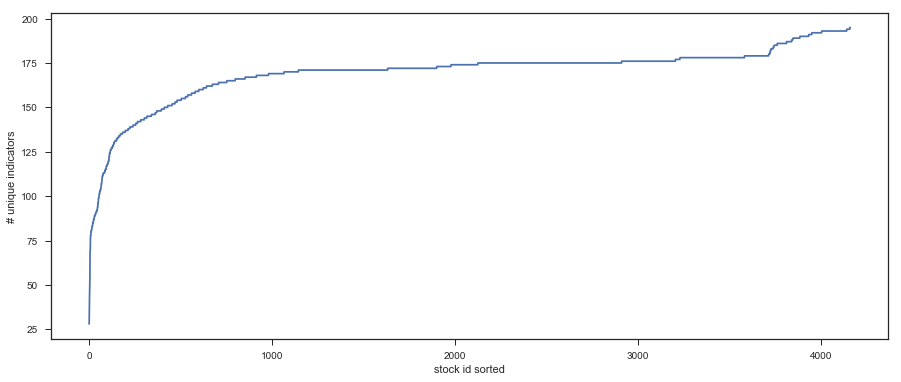

In [7]:
#how many distinct indicators are present per ticker, sort them and plot 
tickerIndicators = dfn.groupby('ticker').apply(lambda x: len(x.indicator.unique()))
tickerIndicators.sort_values(ascending=True,inplace=True)
plt.plot(tickerIndicators.values)
plt.ylabel('# unique indicators') 
plt.xlabel('stock id sorted') 

In [9]:
#how many nulls are there in each colum
dfn.groupby('indicator').apply(lambda x: x.isnull().sum())
#looks like only consolidated column has missing values

,date,ticker,freq,indicator,standalone,consolidated
indicator,,,,,,
ACCRUALS,0,0,0,0,0,29650
ADJCLOS,0,0,0,0,0,15359
ADV,0,0,0,0,0,110
ADVYIELD,0,0,0,0,0,112
AE,0,0,0,0,0,30365
ASETTO,0,0,0,0,0,30379
ASSOC,0,0,0,0,6040,0
ATM,0,0,0,0,0,281
BBETA,0,0,0,0,5,16806


In [31]:
#What fraction is nulls in each column if grouped by date? 
frac_nulls_bydate = dfn.groupby('date').apply(lambda x: x.isnull().sum()/x.isnull().count())


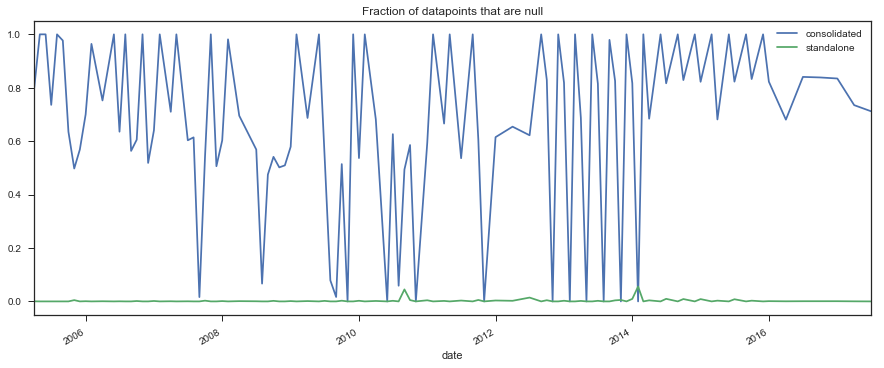

In [28]:
plt.rcParams.update({'font.size': 10})
frac_nulls_bydate['consolidated'].plot()
plt.hold
frac_nulls_bydate['standalone'].plot()
plt.legend(['consolidated','standalone'])
plt.title('Fraction of datapoints that are null');

In [44]:
#There is an interesting up and down pattern. Maybe we can group by month and check?
frac_nulls_bymonth_freq = dfn.groupby([dfn.date.dt.month, 'freq']).apply(lambda x: x.isnull().sum()/x.isnull().count())
count_bymonth_freq = dfn.groupby([dfn.date.dt.month, 'freq']).apply(lambda x: x.count())


In [48]:
frac_nulls_bymonth_freq[count_bymonth_freq.date>2000]


date  ticker  freq  indicator  standalone  consolidated
date freq                                                         
3    A      0.0     0.0   0.0        0.0    0.001142      0.668570
     Q      0.0     0.0   0.0        0.0    0.004718      0.827842
6    A      0.0     0.0   0.0        0.0    0.001208      0.571696
     Q      0.0     0.0   0.0        0.0    0.005768      0.834695
9    A      0.0     0.0   0.0        0.0    0.002083      0.544914
     Q      0.0     0.0   0.0        0.0    0.004177      0.839539
12   A      0.0     0.0   0.0        0.0    0.001668      0.586723
     Q      0.0     0.0   0.0        0.0    0.004799      0.832513

In [49]:
frac_nulls_by_ticker = dfn.groupby('ticker').apply(lambda x: x.isnull().sum()/x.isnull().count())


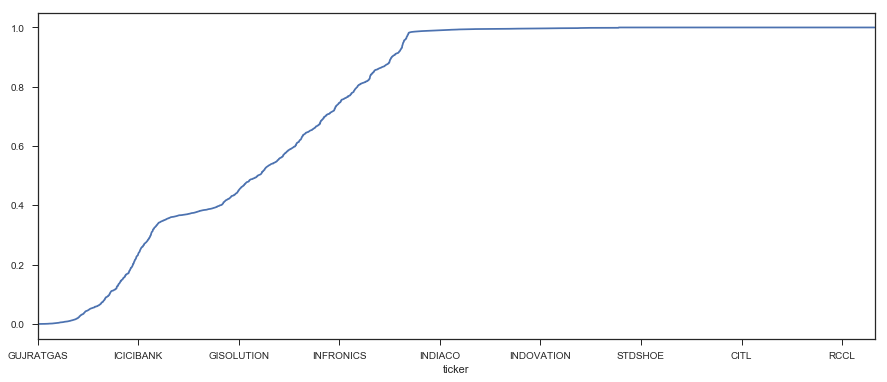

In [52]:
frac_nulls_by_ticker['consolidated'].sort_values().plot();

### EUREKA! So some companies never have consolidated data available

This might mean the companies who have subsidiaries report both standalone as well 
as consolidated, while those companies who don't have any subsidiary report only standalone? The companies who never had any subsidiary correspond to the flat portion?

Then why is is the above chart not a step function from 0 to 1? Why is it slowly ramping up? Maybe these companies didn't have any subsidiary upto some time, and later acquired some firm? Or maybe they had a subsidiary and sold it off later? 

In [53]:
frac_nulls_by_ticker['consolidated'].sort_values()

ticker
GUJRATGAS     0.0
HCLTECH       0.0
INFY          0.0
SHANKARA      0.0
SFL           0.0
TATAGLOBAL    0.0
MPHASIS       0.0
DABUR         0.0
HELIOSMATH    0.0
HPL           0.0
TEJASNET      0.0
ESSARPORTS    0.0
ROLTA         0.0
QUESS         0.0
ERIS          0.0
ADVENZYMES    0.0
VBL           0.0
RANEHOLDIN    0.0
INFIBEAM      0.0
STEELCITY     0.0
HDFC          0.0
ENDURANCE     0.0
GUJFLUORO     0.0
CADILAHC      0.0
BSE           0.0
SPAL          0.0
ALKEM         0.0
ORBITCORP     0.0
LTI           0.0
MAMPMFIN      0.0
             ... 
RUBYTEL       1.0
INFRAIND      1.0
RTFL          1.0
BETKAPA       1.0
BFFL          1.0
BENARAS       1.0
BEEKAY        1.0
INDTERRAIN    1.0
INDSWFTLTD    1.0
INDOCITY      1.0
SAPL          1.0
INDOCRED      1.0
SANOFI        1.0
BCP           1.0
SANGHVIMOV    1.0
BCPAL         1.0
INDOEURO      1.0
SANGAMIND     1.0
SANDUPHQ      1.0
INDOSOLAR     1.0
INDOTECH      1.0
INDRAMEDCO    1.0
SANBLUE       1.0
SANASATECH    1.0
SAM

In [75]:
## Lets take a ticker with missing data in consolidated somewhere around 0.5
tickers_with_half_missing_consul = frac_nulls_by_ticker[frac_nulls_by_ticker['consolidated'].between(0.49,0.51)].index
tickers_with_half_missing_consul = tickers_with_half_missing_consul.tolist()
dfn_sub = dfn[dfn.ticker.isin(tickers_with_half_missing_consul)]

#frac_nulls_by_ticker[]

In [87]:
dfn_sub[['consolidated','ticker']].groupby(['ticker', dfn.date.dt.year]).apply(lambda x: x.isnull().sum()/x.isnull().count())

consolidated  ticker
ticker   date                      
ABGSHIP  2005      1.000000     0.0
         2006      0.127119     0.0
         2007      0.000000     0.0
         2008      0.977612     0.0
         2009      0.099338     0.0
         2010      0.066667     0.0
         2011      0.072289     0.0
         2012      0.163265     0.0
         2013      0.511976     0.0
         2014      0.568365     0.0
         2015      0.600522     0.0
         2016      1.000000     0.0
AHLEAST  2008      1.000000     0.0
         2009      0.187500     0.0
         2010      0.000000     0.0
         2011      0.062500     0.0
         2012      0.176796     0.0
         2013      0.540541     0.0
         2014      0.577540     0.0
         2015      0.625668     0.0
         2016      0.624658     0.0
         2017      1.000000     0.0
AHLUCONT 2005      1.000000     0.0
         2006      1.000000     0.0
         2007      1.000000     0.0
         2008      0.208955     0.0
         2009      0.078431     0.0
         2010      0.144578     0.0
         2011      0.073171     0.0
         2012      0.229167     0.0
...                     ...     ...
TRIL     2012      0.183333     0.0
         2013      0.545171     0.0
         2014      0.596685     0.0
         2015      0.630728     0.0
         2016      0.775000     0.0
         2017      1.000000     0.0
UNOINDL  2005      1.000000     0.0
         2006      1.000000     0.0
         2007      1.000000     0.0
         2008      1.000000     0.0
         2009      1.000000     0.0
         2010      1.000000     0.0
         2011      1.000000     0.0
         2012      0.230415     0.0
         2013      0.231013     0.0
         2014      0.099125     0.0
         2015      0.074890     0.0
VJLAXMIE 2005      0.138889     0.0
         2006      0.024194     0.0
         2007      0.000000     0.0
         2008      0.000000     0.0
         2009      0.000000     0.0
         2010      0.000000     0.0
         2011      0.000000     0.0
         2012      0.345622     0.0
         2013      0.562112     0.0
         2014      0.604905     0.0
         2015      1.000000     0.0
         2016      1.000000     0.0
         2017      1.000000     0.0

[531 rows x 2 columns]

In [30]:
frac_nulls_by_indicator = dfn.groupby('indicator').apply(lambda x: x.isnull().sum()/x.isnull().count())


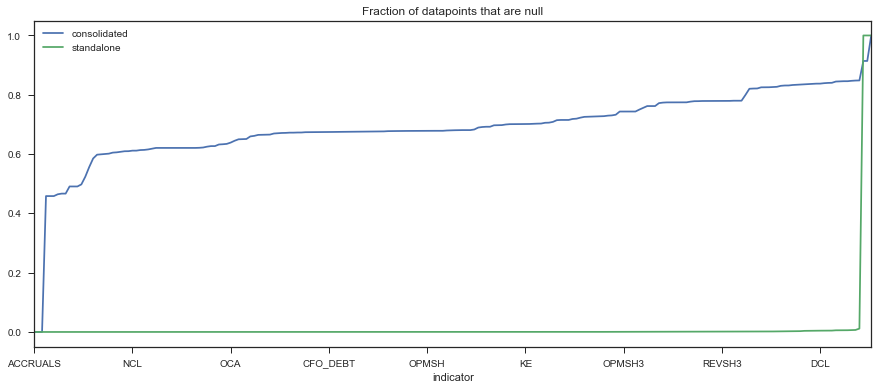

In [35]:
frac_nulls_by_indicator['consolidated'].sort_values().plot();
plt.hold
frac_nulls_by_indicator['standalone'].sort_values().plot();
plt.legend(['consolidated','standalone'])
plt.title('Fraction of datapoints that are null');

In [ ]:
#let us see if there is a pattern in where the consolidated column is null
dfn['consIsNull'] = dfn.consolidated.isnull()
grouped = dfn.groupby(['freq','consIsNull'])
grouped.size().plot(kind='bar')

### For a financial info released with Annual frequency, 'consolidated' result is 1.5 times more likely to be null than not. 
### For a financial info released with Quarterly frequency, 'consolidated' result is 4 times more likely to be null than not.

In [ ]:
#lets see if there is a pattern in dates, when this data gets released
dfn['date'].dt.month.value_counts() 

In [ ]:
#only 4 months! not unexpected because Indian fundamental data is to be released quarterly. Lets get down to dates now.
dfn['date'].value_counts()

In [ ]:
#something surely looks odd. How can all data release exactly on the last day of the Quarter? This is surely wrong as per
#quick googling!! lets check in the orignal dataframe df
df['date'].value_counts().plot()

### Lets explore the second data set, i.e. price and volume history

In [88]:
#The below is the first of the two quandl datasets I have subscribed to. This one contains core fundamental data for India 
### please unzip TC1.zip file in ./DEB to be able to run the below code ###
prc = pd.read_csv('TC1\\TC1_20170717.csv', 
                 names = ['ticker','date','open','high','low','last','close','volume','valueTraded'],
                 header = None, parse_dates = ['date'])


In [89]:
prc.head(5)

,ticker,date,open,high,low,last,close,volume,valueTraded
0,20MICRONS,2008-10-06,40.00,40.00,15.80,16.78,16.83,23501730.0,4849.07
1,20MICRONS,2008-10-07,16.00,19.00,13.93,15.03,15.05,9113422.0,1435.99
2,20MICRONS,2008-10-08,14.00,14.60,12.55,13.20,13.25,2464384.0,330.90
3,20MICRONS,2008-10-10,12.45,12.45,10.83,11.83,11.60,1207928.0,141.93
4,20MICRONS,2008-10-13,12.15,13.30,11.65,12.35,12.33,898692.0,114.01


In [90]:
#how many distinct tickers are there in this data?
len(prc.ticker.unique())

1480

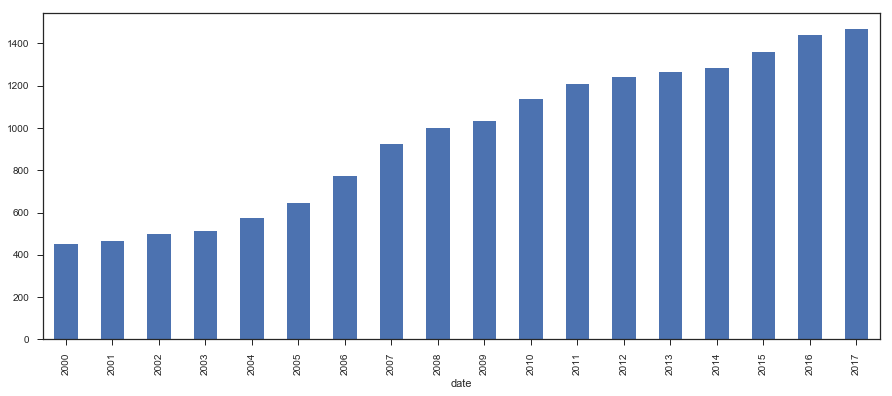

In [91]:
#how many distinct tickers are there in each calendar year of data?
prc['ticker'].groupby(prc.date.dt.year).apply(lambda x: len(x.unique())).plot(kind = 'bar')

## plot close prices of top 200 tickers by average daily value traded in this dataset.


In [ ]:
prc.date.min()

In [ ]:
#filter out top200 most liquid stock's close price data
vt = prc.loc[prc.date>='2007-01-01',['ticker','valueTraded']].groupby('ticker').mean()
top200 = vt['valueTraded'].sort_values(ascending = False).head(200)
prcfilt = prc.loc[prc.ticker.isin(top200.index) & (prc.date>='2007-01-01'),['date','ticker','close']]


In [ ]:
#Transform the data so that each price begins with 100. 
#This gets tricky because not every stock is present from day 1, some got listed only recently
#So first we need to fill backfill nans with initial closing price and then we need to 100 base each stock price
#All these manipulations are much easier to do by bringing all stock prices into separate columns
prcNorm = prcfilt.set_index(['date','ticker']).unstack().fillna(method='bfill').apply(lambda x:100*x/x[0]).stack().reset_index()

In [ ]:
#add a column called liquidity having values 1 to 25, 25 being most liquid
top200df = pd.DataFrame(top200).reset_index()
top200df['liquidityRank'] = 1+ np.floor(top200df.index/8)
top200df.drop('valueTraded',axis=1,inplace=True)
prcNorm = prcNorm.merge(top200df,on='ticker',how='left')


In [ ]:
#write a function to plot the price chart of all stocks in the liquidity bucket that is input
def chartStocks(df, liq, **kwargs):
    if 'col' in kwargs:
        col_to_plot = kwargs.pop('col')
    else:
        col_to_plot = 'close'
    dffilt = df.loc[df.liquidityRank == liq,['date','ticker',col_to_plot]]
    dffilt.set_index(['date','ticker']).unstack().plot()
    plt.legend()
    plt.grid()
    

In [ ]:
## Below is a nice tool to plot normalized prices of stocks (top200 by value traded) in groups of 8 
#to check if all is well with this data set. 
chartStocks(prcNorm,1)  #keep changing the second input from 1 to 25

In [ ]:
#Oh, why is there a massive jump down in ARCOTECH? (chartStocks(prcNorm, 14))In a corporate action adjusted data there 
#shouldnt be huge jumps because stock splits etc are already adjusted for, and if a stock genuinely moves in one day by 
#so much, circuit breaker rules will halt its trading

#lets have a closer look around this time window
prc.loc[(prc.ticker == 'ARCOTECH')&(prcfilt.date > '2014-03-21')&(prcfilt.date < '2014-04-22'),:]

In [ ]:
#ok some googling reveals that this stock got listed in NSE in April 2014. Before that only BSE. So does this vendor contain BSE
#data if stock not listed on NSE? Asked quandl and vendor the question

In [ ]:
## So, we have been able to find out two problems one in each dataset by methodically exploring the data!

## Let's try to see how the two datasets can be joined

In [ ]:
dfn.head()

In [ ]:
prc.head()

**the ticker column looks similar, lets check how many tickers match** 

In [ ]:
common_tickers = np.intersect1d(dfn.ticker.unique(),prc.ticker.unique())
print("Num tickers in fundamental data:" ,len(dfn.ticker.unique()))
print("Num tickers in price data:" ,len(prc.ticker.unique()))
print("Num of tickers in both datasets:" ,len(common_tickers))

### Earning's release dates have been found from 2011 onwards on NSE website! 

In [3]:
common_tickers = []

In [4]:
#download_earnings_dates is a function I wrote that downloads earnings dates from NSE 
#website. Because it takes about 10-15 minutes to download, the function simply loads 
#from a file if it already exists
from earnings_dates import download_earnings_dates

earnings_dates = download_earnings_dates(common_tickers)
earnings_dates.head()

earnings_release_dates.csv found, loading from it.
If you want to download from NSE, delete this file


,BoardMeetingDate,Company,Industry,Purpose,Symbol
0,2015-10-08,8K Miles Software Services Limited,-,Results/Others,8KMILES
1,2016-01-08,8K Miles Software Services Limited,-,Results/Others,8KMILES
2,2016-05-09,8K Miles Software Services Limited,-,Results,8KMILES
3,2016-07-08,8K Miles Software Services Limited,-,Results,8KMILES
4,2016-11-07,8K Miles Software Services Limited,-,Results,8KMILES


In [5]:
earnings_dates.columns = ['BoardMeetingDate', 'Company', 'Industry', 'Purpose', 'ticker']
#earnings_dates.set_index(['ticker','BoardMeetingDate'],inplace=True)
earnings_dates.head(10)

,BoardMeetingDate,Company,Industry,Purpose,ticker
0,2015-10-08,8K Miles Software Services Limited,-,Results/Others,8KMILES
1,2016-01-08,8K Miles Software Services Limited,-,Results/Others,8KMILES
2,2016-05-09,8K Miles Software Services Limited,-,Results,8KMILES
3,2016-07-08,8K Miles Software Services Limited,-,Results,8KMILES
4,2016-11-07,8K Miles Software Services Limited,-,Results,8KMILES
5,2017-01-09,8K Miles Software Services Limited,-,Results,8KMILES
6,2017-05-10,8K Miles Software Services Limited,-,Results/Dividend,8KMILES
7,2014-02-13,A2Z INFRA ENGINEERING LIMITED,-,Results,A2ZINFRA
8,2014-05-30,A2Z INFRA ENGINEERING LIMITED,-,Results,A2ZINFRA
9,2014-08-14,A2Z INFRA ENGINEERING LIMITED,-,Results,A2ZINFRA


In [9]:
#check for nulls in earnings_dates
print(earnings_dates.isnull().sum())
#earnings_dates.to_csv('earnings_release_dates.csv')

BoardMeetingDate    0
Company             0
Industry            0
Purpose             0
ticker              0
dtype: int64


In [7]:
earnings_dates = earnings_dates[~earnings_dates.Company.isnull()]

In [ ]:
#The earnings release dates have the BoardMeetingDate, the date on which financial results 
#are made public after the close of market-hours for the day. 

#But unfortunately, it does not explicitly state which quarter does the BoardMeetingDate
#refer to. We have checked for a few cases and found that earnings are released in within 
#the next quarter. 

#So lets make an assumption here that QuarterEndDate is that of the immediately prior 
#quarter before the BoardMeetingDate
from pandas.tseries.offsets import *

##The below is a class from offets module in pandas.tseries
quarterEnd = QuarterEnd()

#quarterEnd.rollback() is an instance method that takes a date and rolls it back to 
#most recent quarter end date, exactly what we need! 
earnings_dates['QuarterEndDate'] =earnings_dates.BoardMeetingDate.apply(quarterEnd.rollback)
earnings_dates.head(10)

In [ ]:
#Let us see the distribution of BoardMeetingDate - quarterEndDate
earnings_release_delays = (earnings_dates.BoardMeetingDate - earnings_dates.QuarterEndDate)
earnings_release_delays.dt.days.plot(kind='kde',title='Probability density of earnings release delay')
plt.xlabel('Days from Quarter End when the company releases the financial results');
plt.xlim([0,90]);

### Lets add a delay of 63 days whenever we don't have earnings release date
We don't have earnings release dates for data before 2011 (and maybe some gaps afterwards as well) so based on the above chart let us add a delay of 63 days to be on the conservative side for all datapoints where we do not have the exact earnings release date. 

### Analyze the feature values

1/	Data exploration to decide the date range for training set and test-set and stock universe for this study. Factors involved:
a.	Data availability
b.	Stock liquidity
c.	Avoid any bias in universe selection like survivorship
2)	Investment signal creation and classification: A close look at fundamental data set to see whether it needs enrichment i.e. computing well known indicators to make a comprehensive list of possible investment signals classified into various factors like growth, value, quality, size, momentum etc
3)	Visualize performance of individual investment signals If each investment signal is used only by itself as a ranker for long stock portfolio, how is the in-sample performance of the strategy. 
4)	Data pre-processing like filling missing data, normalizing, uniformizing, sector-neutralizing, quantizing, winsorizing etc to make variations in output variable (returns) more sensitive to variations in input variables and also make combining variables more sensible. 
5)	Create a benchmark by using a simple linear model (with some basic checks) for other machine learning techniques to see if they do any better
6)	Test most promising models as per the paper and see if they perform any better than the simple model
7)	Document the conclusions and insights 
